In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

## Example data

from this Chris Albon [blog post](http://chrisalbon.com/python/matplotlib_plot_points_on_map.html)

In [2]:
raw_data = {'latitude': [27.173968, 27.164328, 20.930555, 31.784217, 29.935895],
            'longitude': [78.037519, 78.015289, 49.948611, 35.134277, 29.935895]}
df = pd.DataFrame(raw_data, columns = ['latitude', 'longitude'])
df

,latitude,longitude
0,27.173968,78.037519
1,27.164328,78.015289
2,20.930555,49.948611
3,31.784217,35.134277
4,29.935895,29.935895


## Mark the data using basemap

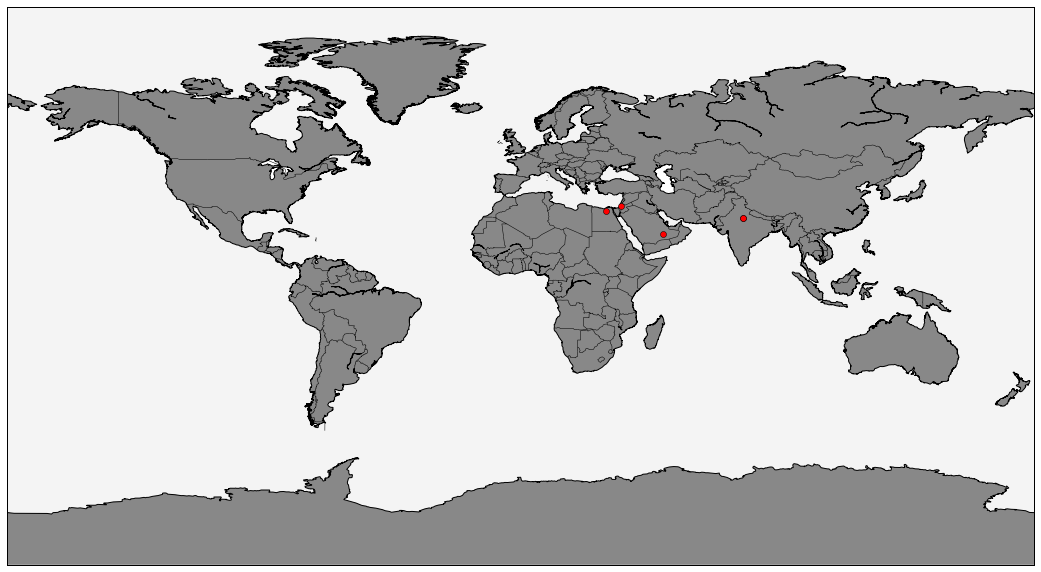

In [3]:
# Create a figure of size (i.e. pretty big)
fig = plt.figure(figsize=(20,10))

# Create a map, using the Gall–Peters projection, 
map = Basemap(projection='gall', 
              # with low resolution,
              resolution = 'l', 
              # And threshold 100000
              area_thresh = 100000.0,
              # Centered at 0,0 (i.e null island)
              lat_0=0, lon_0=0)

# Draw the coastlines on the map
map.drawcoastlines()

# Draw country borders on the map
map.drawcountries()

# Fill the land with grey
map.fillcontinents(color = '#888888')

# Draw the map boundaries
map.drawmapboundary(fill_color='#f4f4f4')

# Define our longitude and latitude points
# We have to use .values because of a wierd bug when passing pandas data
# to basemap.
x,y = map(df['longitude'].values, df['latitude'].values)

# Plot them using round markers of size 6
map.plot(x, y, 'ro', markersize=6)

# Show the map
plt.show()

## Airports example

from this datajoy [blog post](https://www.getdatajoy.com/examples/python-plots/plot-data-points-on-a-map)

* Now the latitude and longitude coordinates are read from a csv file. It contains information about airports all around the world. Only the columns 6 and 7 are read, since they contain the relevant information for the plot.

In [4]:
airports = np.genfromtxt("../data/airports.dat",
                         delimiter=',', 
                         dtype=[('lat', np.float32), ('lon', np.float32)], 
                         usecols=(6, 7))

fig = plt.figure()


* Now the map is created. It uses the Gall Stereographic Projection but there are many others available. The resolution is set to low, it is also possible to draw intermediate, crude, high and full resolution maps. The parameter area_thresh is the minimal area, in square kilometres, for a coastline or lake to be included in the map.

In [5]:
themap = Basemap(projection='gall',
              llcrnrlon = -15,              # lower-left corner longitude
              llcrnrlat = 28,               # lower-left corner latitude
              urcrnrlon = 45,               # upper-right corner longitude
              urcrnrlat = 73,               # upper-right corner latitude
              resolution = 'l',
              area_thresh = 100000.0,
              )
              

The next lines will:
* add the coastlines
* add the country borders
* fill the land in the `gainsboro` colour. Html hexadecimal notation and html colour names can be used here
* set the oceans colour to `steelblue`


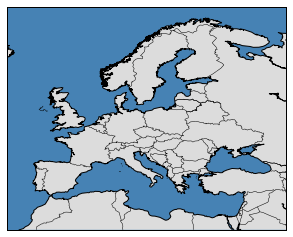

In [6]:
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')

* Now we compute the coordinates of the airports in the corresponding projection and add the points to the map. The last command will finally display the plot.

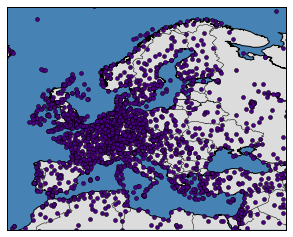

In [7]:
themap.drawcoastlines()
themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')
x, y = themap(airports['lon'], airports['lat'])
themap.plot(x, y, 
            'o',                    # marker shape
            color='Indigo',         # marker colour
            markersize=4            # marker size
            )

plt.show()